# Simulate with the Jansen and Rit model. 

White noise is added to one specific state variable to emulate the external
stochastic stimulus p(t) as described in [JansenRit_1995]

In [1]:
%pylab inline

from tvb.simulator.lab import *


Populating the interactive namespace from numpy and matplotlib
2020-05-23 13:36:58,882 - WARNING - tvb.simulator.common - psutil module not available: no warnings will be issued when a
    simulation may require more memory than available
   INFO  log level set to INFO


WARNING  File 'hemispheres' not found in ZIP.


/opt/app-root/lib/python3.6/site-packages/tvb/simulator/coupling.py:365: RuntimeWarning: overflow encountered in exp
  pre = self.cmax / (1.0 + numpy.exp(self.r * (self.midpoint - (x_j[:, 0] - x_j[:, 1]))))
/opt/app-root/lib/python3.6/site-packages/tvb/simulator/models/jansen_rit.py:273: RuntimeWarning: overflow encountered in _numba_dfun_jr
  self.A, self.b, self.B, self.J, self.mu


Text(0.5, 1.0, 'Temporal Average')

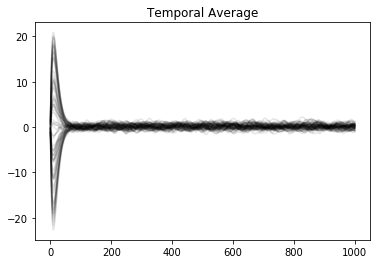

In [2]:
jrm = models.JansenRit(mu=numpy.array([0.]), v0=numpy.array([6.]))

phi_n_scaling = (jrm.a * jrm.A * (jrm.p_max-jrm.p_min) * 0.5 )**2 / 2.
sigma         = numpy.zeros(6) 
sigma[3]      = phi_n_scaling

# the other aspects of the simulator are standard
sim = simulator.Simulator(
    model=jrm,
    connectivity=connectivity.Connectivity.from_file(),
    coupling=coupling.SigmoidalJansenRit(a=numpy.array([10.0])),
    integrator=integrators.HeunStochastic(dt=2 ** -4, noise=noise.Additive(nsig=sigma)),
    monitors=(monitors.TemporalAverage(period=2 ** -2),),
    simulation_length=1e3,
).configure()

# run it
(time, data), = sim.run()

# visualize time series
figure()
plot(time, data[:, 0, :, 0], 'k', alpha=0.1)
title("Temporal Average")